In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy.stats import iqr
from scipy.stats import bootstrap
import scipy.stats as ss
from scipy.stats import binom
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
import random
import scipy.integrate as integrate


# Chapter 2: Data and Sampling Distributions 

Any data scientific project need to answer to a certain number of questions. But to formulate response to those questions, we need to understand the possible biases and reduce them as much as we can. Indeed, bias is define as any tendency that prevents unprejudiced answer of a question. They can have different orgins [Identifying and Avoiding Bias in Research, google ML course]:

- data collection (or selection bias)
- data measurement
- data analysis

### Data collection (or sampling bias)
It refers to a bias that occurs due to the method used to sample participants from the population. It describes a situation where the sample does not accurately represent the population from which it was drawn, leading to skewed results that do not generalize well to the broader population.

#### Causes
- convenience sampling
    * collect data from a source that might oriente the result
    * survey friends
- response bias 
    * inacurate response from participants 
    * personal questions that people want to hide
- undercoverage 
    * not sample a part of a population
    * survey from electronic devices (not represent elderly)
- volontary response sampling
    * let the initiative to the people to response (tripadvisor)
- nonresponse
    * participant that refuse to take part of a study
    * the one not responding might a different opinions than the others

#### Mitigation strategies
* Random Sampling: Implement truly random sampling where every member of the population has an equal chance of being selected. This can minimize selection bias significantly.
* Stratified Sampling: Divide the population into strata (subgroups) and randomly sample from each stratum. This ensures representation across key variables (e.g., age, gender).
* Oversampling Underrepresented Groups: In cases where certain population segments are at risk of undercoverage, intentionally oversampling these groups can ensure their adequate representation.


### Data measurement 
These biases occur due to the way data are collected, recorded, or measured, leading to inaccuracies in the data itself.
- Measurement Bias: 
    * Systematic error introduced by measuring instruments or procedures
- Chronology bias
    * Occurs when the time period chosen for the study influences the selection of participants, thereby affecting the study outcomes
- Attrition Bias
    * Happens when participants drop out of the study before it is completed, and the characteristics of dropouts significantly differ from those who remain
- Reporting bias
    * the frequency of the variable measured is not a good representation of the population
- Observation Bias
    * Introduced when the method of observing or recording data causes selective data points to be included or
    highlighted over others.
- Channeling Bias 
*   Arises in clinical settings when patients are channeled into different treatments based on prognosis or severity, which is not accounted for in the analysis.

Here different strategies against selection bias:
* Standardization of Procedures: Ensure measurement procedures are consistent across all data collection points. Use standardized tools and techniques to minimize variation.
* Blind Measurements: When possible, employ blind measurement techniques where the data collector is unaware of the hypothesis being tested. This prevents their expectations from influencing the outcomes.

### Data analysis 

Biases in this category occur during the interpretation of data, often influencing the conclusions drawn from the data.
- Implicit data bias
    * when individuals make assumptions and respond based on their experiences, often without being consciously aware of the bias.
- Group attribution bias
    * generalize the features of an individual to all the individuals that belong to the same group   
    * measure depends on the people survey.
- Automation data bias
    * when people tend to favour information generated by automated systems over human-generated sources

* Cross-Validation: Use techniques like cross-validation to assess how well your model performs on unseen data. This can help identify and mitigate overfitting and implicit bias in model training.
* Regularization: Employ regularization methods to prevent overfitting your model to the training data, which can be a source of bias in predictive modeling.
* Diverse Testing Datasets: Test models on a diverse set of data that reflects the variety in the real world. This can help identify biases in model performance across different groups.
* Inclusion of Diverse Perspectives: Engage a diverse team in the data analysis process. Different perspectives can help identify biases that might not be apparent to everyone.


### Conclusion


In summary, bias is a significant issue at every stage of a data science project, from how we collect and measure data to how we analyze it. But by being aware of these biases and actively taking steps to mitigate them, we can make our analyses more accurate and our conclusions more reliable. Strategies like random and stratified sampling, standardizing measurement procedures, and ensuring diverse perspectives in data analysis are crucial. It's our responsibility as data scientists to continually check for and address biases in our work. By doing so, we ensure our projects truly reflect the reality they aim to understand and predict, making our findings valuable and trustworthy.

### Sampling Distribution of a Statistic

The measurement of a statistic is likely to vary between the sample and the population but also between different samples obtained from the same population. The distribution of this statistic across the samples is named sampling distribution. As an example, I will calculate the body mass index from 100 different samples. The latters are randomly obtained from the dataset by the python sample function of random module. The sample() function generates a random selection of a specified size from a dataset, ensuring that each object is chosen only once. This "without replacement" approach guarantees that no object is picked more than once for the sample. This method is typically used for creating diverse and representative samples of the population.

In [117]:
df = pd.read_csv("cleaned_data.csv") 
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


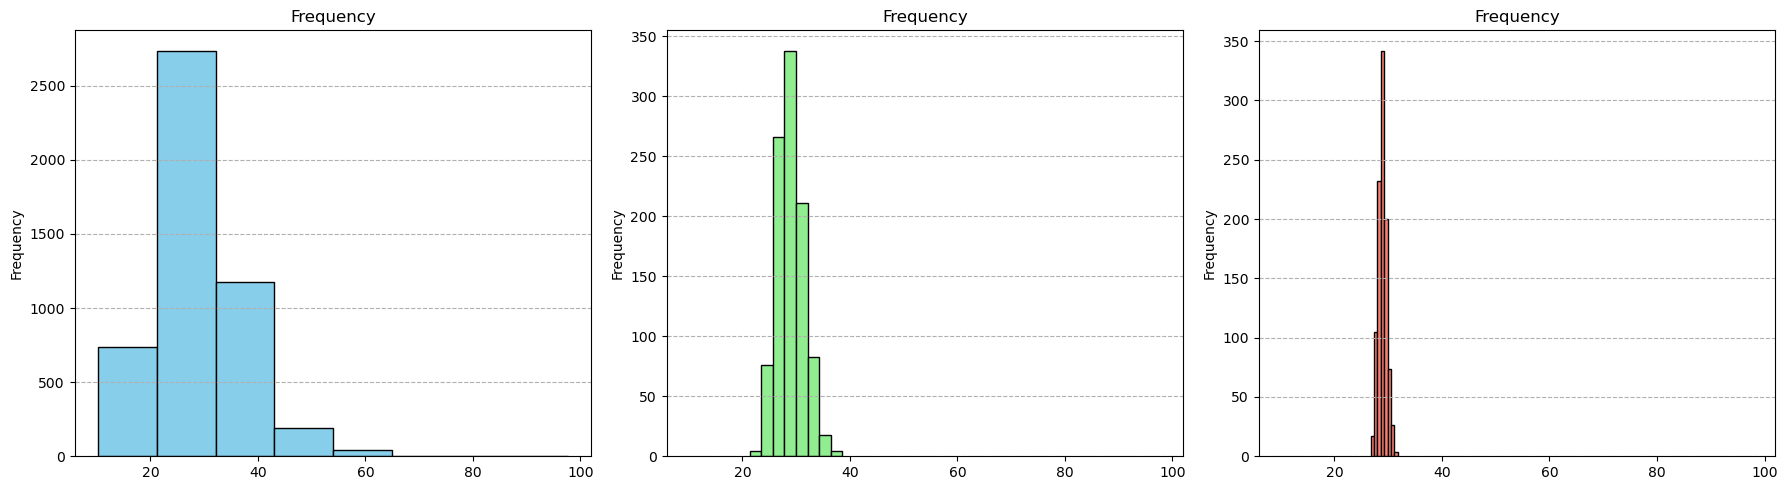

In [118]:
# Load the data
bmi = df["bmi"].to_list()

# Generate mean bmi samples
mean_bmi_100 = [stat.mean(random.sample(bmi, 100)) for _ in range(1000)]
mean_bmi_10 = [stat.mean(random.sample(bmi, 10)) for _ in range(1000)]

# Create the subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18, 5))

# Histogram for the original bmi data
def plot_hist(data, ax,color,title):
    ax.hist(data, bins=8, color=color, edgecolor='black')
    ax.set_title(title)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--')

plot_hist(bmi, ax1,"skyblue","Frequency")
plot_hist(mean_bmi_10, ax2,"lightgreen","Frequency")
plot_hist(mean_bmi_100, ax3,"salmon","Frequency")

plt.tight_layout()
plt.show()

We can see the sampling distribution of the mean forms a bell-shaped or normal distribution. This phenomena is known as the Central Limit Theorem. The Central Limit Theorem states that the distribution of the sample means approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution.  Indeed, the spread of the distribution shrinks with increasing size. The spread of the sampling distribution is known as the standard error and can be approximated by the following formula:
se = std/n**0.5

where se is the standard error and std the standard deviation of the population. In the following I apply the above formula to calculate the standard error:

In [119]:
std_bmi = stat.stdev(bmi)  # Population standard deviation
se_mean_100_numerical = stat.stdev(mean_bmi_100)  # Standard error from the sampling distribution
se_mean_100_formula = std_bmi / (100 ** 0.5)  # Standard error calculated using the formula

# Formatted output message for clarity and precision
output_message = (f"Standard error numerically computed: {se_mean_100_numerical:.4f} "
                  f"and using the formula: {se_mean_100_formula:.4f}")

print(output_message)

Standard error numerically computed: 0.7757 and using the formula: 0.7854


We can see that the formula gives a good approximation of the standard error. However most of the time we only have access to one sample and not the the whole population. In this case, we can use the bootstrap to generate new samples:

### The bootstrap 

The bootstrap allows to generate many samples from one sample. To do so, we draw randomly N values to form a new sample from the original. At each draw from the latter, we replace the values (resampling with replacement). Because the same data point can be sampled multiple times, bootstrap methods can create numerous, re-sampled datasets that mimic the process of sampling from the underlying population.

Thus, from each sample generated, we calculate a statistic (mean, median etc), and from all of them, their distribution is exctracted.  <br> In the following I generate 1000 samples using the random.choices python function of 100 values. From each sample I calculate the mean, and then determine the standard error:

In [120]:
mean_list = []

# Bootstrap 1000 times
for _ in range(1000):
    # Generate a bootstrap sample of size 100 from the bmi list using random.choices
    list_tmp = random.choices(bmi, k=100)
    # Calculate the mean of the bootstrap sample and append it to mean_list
    mean_list.append(np.mean(list_tmp))

# Calculate the standard error of the sample means obtained by bootstrapping
standard_error = stat.stdev(mean_list)

# Output the result
print(f'The standard error obtained by bootstrapping: {standard_error}')


The standard error obtained by bootstrapping: 0.8001389834127423


We can see that the standard error generates by bootstraping is similar to the ones obtained above. <br> 

The bootstraping is also used to calculate the interval confidence interval. The latter is the interval that enclosed x% of the sampling distribution around a central value. It is good to note that it does not describe any probability. 

We can obtain the x% confidence interval by using percentiles. I obtain the lower limit as the following percentile: (100-x)/2 and the upper one as: (100+x)/2. 

As an example, if we want to calculate a 80% confidence interval
* the lower limit is (100-80)/2 = 10th percentile
* the lower limit is (100+80)/2 = 90th percentile

In [121]:
x = 80  # Width of the confidence interval (in percentage points)

# Calculate the percentiles for the lower and upper limits of the confidence interval
per_1 = (100 - x) / 2  # The percentile of the lower limit
per_2 = (100 + x) / 2  # The percentile of the upper limit

# Calculate the confidence interval based on percentiles
first_interval = np.percentile(mean_list, per_1)
second_interval = np.percentile(mean_list, per_2)

# Output the confidence interval
print(f'The {x}% confidence interval is: {first_interval}-{second_interval}')

The 80% confidence interval is: 27.8755-29.936300000000003


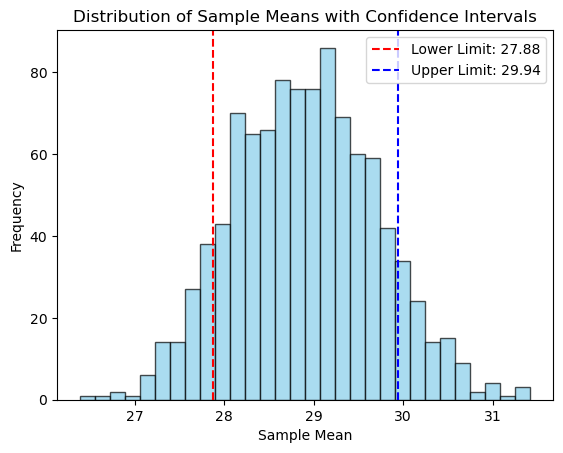

In [122]:
plt.hist(mean_list, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Vertical lines to indicate the confidence interval boundaries
plt.axvline(x=first_interval, color='red', linestyle='--', label=f'Lower Limit: {first_interval:.2f}')
plt.axvline(x=second_interval, color='blue', linestyle='--', label=f'Upper Limit: {second_interval:.2f}')

plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means with Confidence Intervals')

plt.legend()
plt.show()

We saw that the sampling distribution takes a bell-shaped curve. There are different mathematical models that describe these distributions.

## Distributions

A distribution, in statistics, refers to a function that describes the probability (frequency) of occurrence of different possible outcomes in a statistical experiment. It is often easier to work with distribution (=function) instead of raw data, it can be also apply to every experiment of the same type, and fill the gap of missing data.

### Normal distribution

The normal distribution is characterized by its bell-shaped curve with the majority of the data clustered around the mean, and tails that extend infinitely in both directions. The function is defined by two parameters: the mean and standard deviation. 

#### Applications 

The normal distribution is crucial in fundamental science and statistics. Various phenomena exhibit a normal distribution, such as heights of individuals in a population, and errors in measurements. It serves as a basis for the Central Limit Theorem, which states that the means of samples of a population will themselves be normally distributed, regardless of the population's distribution, given a sufficiently large sample size.

#### Limitations
* Assumption of Normality
    - Data need to be normaly distributed.
* Applicability to Discrete Data
    - The normal distribution is continuous, making it less suitable for modeling discrete data directly. 


#### Example 

In this example, I will investigate if the means of the body mass index (bmi) calculated from a thousand samples follow a normal distribution. For doing so, I will write a code following the steps:

1. Define the normal distribution function
2. Generate 1000 samples from the age population using a bootstrap method
3. Calculate the mean and standard deviation for each sample
4. Using the means obtained in 3., calculate their distribution based on 1.
5. Calculate how much of the data falls within one standard deviation of the mean
6. Plot the distribution obtained in 4. along with an histogram



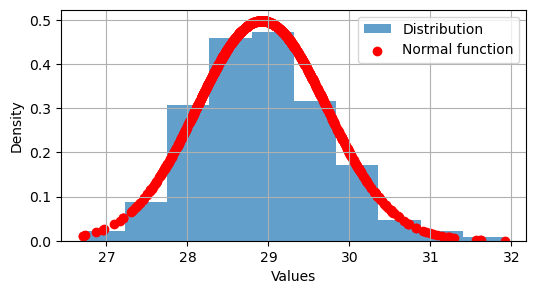

Mean: 28.916119, Standard Deviation: 0.8012428089156246
The probability to obtain a value between [28.11, 29.72] is: 68.27%


In [123]:



#1. Define the function for the normal distribution
def normal(x, std, mean):
    return 1 / (std * (2 * np.pi) ** 0.5) * np.exp(-0.5 * ((x - mean) / std) ** 2)

mean_list = []

#2. Bootstrap 1000 times
for _ in range(1000):
    # Generate a bootstrap sample of size 100 from the age list using random.choices
    list_tmp = random.choices(bmi, k=100)
    # Calculate the mean of the bootstrap sample and append it to mean_list
    mean_list.append(np.mean(list_tmp))


#3. Calculate mean and standard deviation 
mean_value, std_dev = np.mean(mean_list), np.std(mean_list)


#4. Generate a list of y-values using the normal distribution
y_values = [normal(i, std_dev,mean_value ) for i in mean_list]



#5. Integrate the normal distribution function between one standard deviation around the mean
upper_lim = std_dev+mean_value
lower_lim = -std_dev+mean_value
proba, _ = integrate.quad(lambda x: normal(x, std_dev, mean_value),lower_lim, upper_lim)



#6. Creating the histogram and scatter plot
fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(mean_list, bins=10, density=True, alpha=0.7, label='Distribution')
ax.scatter(mean_list, y_values, color="red", label='Normal function')
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.grid(True)
ax.legend()
plt.show()

# Displaying the mean and standard deviation
print(f'Mean: {mean_value}, Standard Deviation: {std_dev}')
# Output the probability
print(f'The probability to obtain a value between [{lower_lim:.2f}, {upper_lim:.2f}] is: {round(proba * 100, 2)}%')



#### Analysis 

The calculated probability value shows how much of the data falls within one standard deviation of the mean. For a perfectly normal distribution, this should be around 68%. Moreober, the close alignment between the histogram and the normal distribution curve implies that the data are normally distributed. Another method to compare the distribution of data with a model is the Quantile-Quantile plot (QQ-plot).



### QQ-plot
QQ-plots are graphical tools used to assess whether a sample of data follows a specific theoretical distribution, such as the normal distribution. They compare the quantiles of the sample data against the quantiles of the theoretical distribution. If the sample data closely follows the theoretical distribution, the points on the QQ plot will fall approximately along a straight line. The outliers on the QQ-Plot may indicate points where the two distributions differ. In the following, I use scipy's probplot function to create the QQ-plot, specifying the distribution as 'norm' for the normal distribution.


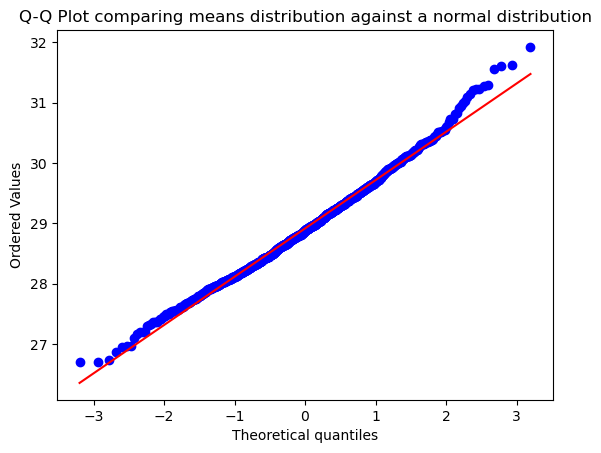

In [124]:
# Generate a QQ-plot to compare the distribution of mean_list against a normal distribution
ss.probplot(mean_list, dist="norm", plot=plt)

plt.title("Q-Q Plot comparing means distribution against a normal distribution")
plt.show()

The points on the QQ plot closely follow a straight line, which indicates sampling distribution of the mean closely matches the theoretical distribution.

### Student’s t-Distribution
The t-distribution, also known as Student's t-distribution, is a probability distribution that is symmetric and bell-shaped, similar to the normal distribution but with heavier tails. It is used instead of the normal distribution for conducting statistical tests or constructing confidence intervals. Indeed, the heavier tails provides more probability weight to observations further from the mean. This adjustment makes it better suited for analysis involving small samples and unknown population standard deviations.

#### Applications
 * Hypothesis Testing: 
    - The t-distribution is primarily used in t-tests, which assess whether the means of two groups are statistically different from each other or whether a single group's mean differs from a specific value.

* Confidence Intervals 
    - It is also used to construct confidence intervals for the mean of a population based on a sample. These intervals provide a range within which the true population mean is expected to fall, taking into account the sample size and variance.

* Regression Analysis:
    - In regression analysis, the t-distribution helps determine the significance of regression coefficients.

#### Limitations
* Assumption of Normality
    - The utility of the t-distribution is based on the assumption that the data are normally distributed. 
* Impact of Outliers: 
    - Like many statistical methods, the t-distribution is sensitive to outliers. 


#### Example 

In this example, I will investigate if the mean bmi is statistically different from Male to Female. In other words, I will compute how likely it is to obtain the observed difference or more extreme result by random chance if the two means are equal (null hypothesis). For doing so, I will write a code following the steps:
1. Select the data from the DataFrame
2. Check if they approximativly follow a normal distribution
3. Calculate the mean, variance, and count
4. Calculate the t-statistic and the p-value

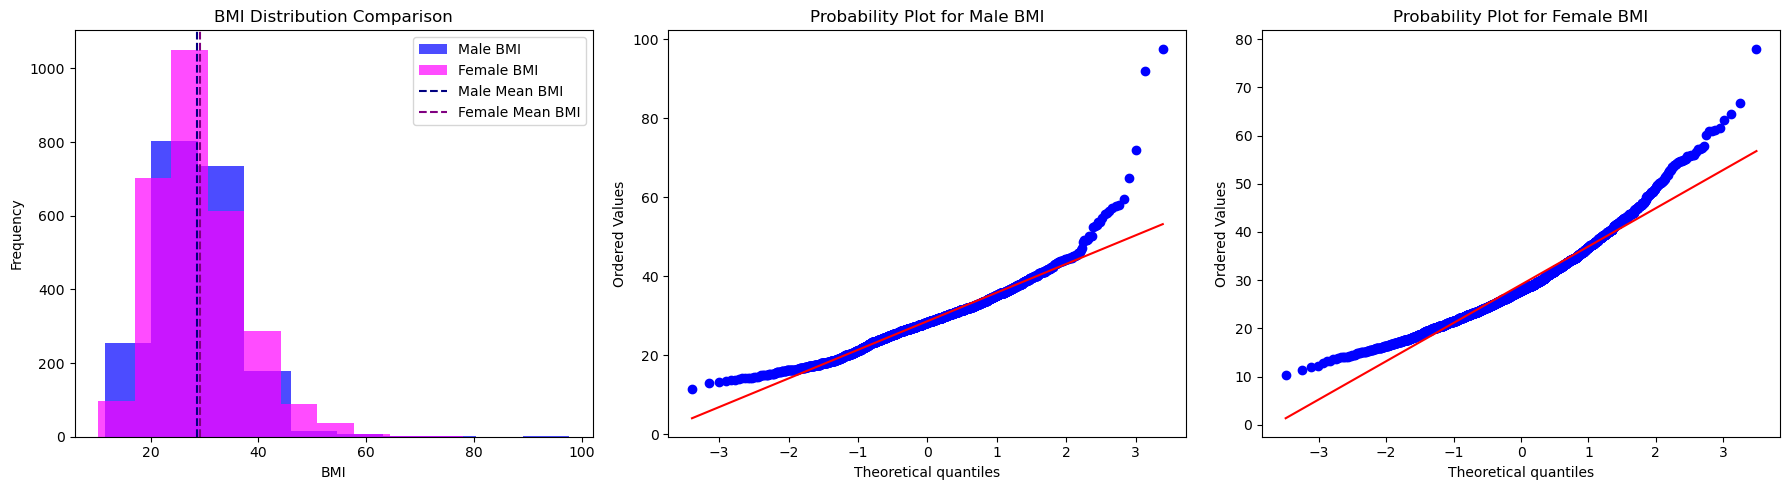

Male - Mean: 28.67, Variance: 55.62
Female - Mean: 29.08, Variance: 65.83
T-statistic: -1.82, P-value: 0.0689


In [125]:



#1 Select the data from the DataFrame
bmi_male_sample = df[df['gender'] == 'Male']['bmi'].dropna().to_list()
bmi_female_sample = df[df['gender'] == 'Female']['bmi'].dropna().to_list()


#2 Check if they approximativly follow a normal distribution
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))
ax1.hist(bmi_male_sample, bins=10, alpha=0.7, color="blue", label="Male BMI")
ax1.hist(bmi_female_sample, bins=10, alpha=0.7, color="magenta", label="Female BMI")
ax1.axvline(x=np.mean(bmi_male_sample), color="navy", linestyle="--", label="Male Mean BMI")
ax1.axvline(x=np.mean(bmi_female_sample), color="purple", linestyle="--", label="Female Mean BMI")
ss.probplot(bmi_male_sample, dist="norm", plot=ax2)
ss.probplot(bmi_female_sample, dist="norm", plot=ax3)
ax1.set_title("BMI Distribution Comparison")
ax1.legend()
ax1.set_xlabel("BMI")
ax1.set_ylabel("Frequency")
ax2.set_title("Probability Plot for Male BMI")
ax3.set_title("Probability Plot for Female BMI")
plt.tight_layout()
plt.show()

#3 Calculate statistics for each sample
def sample_stats(sample, gender):
    mean = np.mean(sample)
    variance = np.var(sample, ddof=1)  # Use ddof=1 for sample variance
    print(f"{gender} - Mean: {mean:.2f}, Variance: {variance:.2f}")
    return mean, variance, len(sample)

mean_male, var_male, count_male = sample_stats(bmi_male_sample, "Male")
mean_female, var_female, count_female = sample_stats(bmi_female_sample, "Female")

# Calculate the t-statistic and degrees of freedom using SciPy
t_stat, p_value = ss.ttest_ind_from_stats(mean1=mean_male, std1=np.sqrt(var_male), nobs1=count_male,
                                          mean2=mean_female, std2=np.sqrt(var_female), nobs2=count_female,
                                          equal_var=False)  # Welch's t-test

print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}')


### Analysis 
The t-statistic of -1.86 indicates that the mean BMI for males is slightly lower than for females. The negative value of the t-statistic reflects the direction of the difference (i.e., the male mean is less than the female mean).

A p-value of 0.0628 suggests that, under the assumption of the null hypothesis (that there is no difference between the two groups), there is a 6.28% probability of observing a difference in mean BMI as large as or larger than the observed difference just by random chance. This p-value is above common significance thresholds such as 0.05 (5%).

Therefore, I failed to reject the null hypothesis, suggesting that the observed difference in mean BMI between the two groups could indeed be attributed to random variation rather than a true difference in the populations.

### Binomial distribution
The binomial distribution is a discrete distribution that gives the probability of a number of successes in a fixed number of independent trials, with each trial having only two possible outcomes. 
The parameters of a binomial distribution are:
* the number of trials n
* the probability of success on an individual trial p 

#### Applications

* Decision making
    -   It give the probability of a certain number success in a "yes or no" experiment: buy/don't buy, like/don't like. It can help to predict purchase decisions, customer conversions, or responses to an advertisement.
* Medicine  
    - It can determine the probability of a certain number of patients responding to treatment.
* Quality Control 
    - It can model the number of defective (or non-defective) products in a batch when each product has the same chance of being defective.

#### Limitations

* Two outcomes
    - Apply to bernoulli trial: two exclusive outcomes
* Constant Probability
    - The probability of success must be the same in each trial
* Independent Trials
    -  There must be independence between the trials.
    
#### Example

In the following, I will use the binomial distribution to calculate the probability distribution of observing a certain number of (k) a stroke. The parameters of the binomial distribution:
* The probability (p) that a patient having a stroke
* The number of time (n) we measuring if a patient had a stroke.

Here the followig step:

1. Filter the DataFrame
2. Obtain p, the probability that a patient has a stroke
    - we can approximate from the proportion of patient having a stroke in the population
3. Define the binomial distribution parameters
4. Generate binomial distribution data
5. Plot the distribution with an histogram

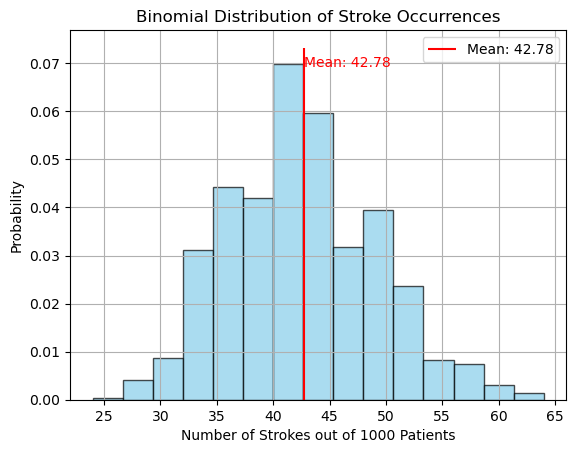

In [127]:

# Assuming df is already loaded and contains the relevant data

# Step 1: Filter the DataFrame for patients who had a stroke
df_stroke = df.loc[df['stroke'] == 1]

# Step 2: Obtain the probability that a patient has had a stroke
proportion_stroke = len(df_stroke) / len(df)  # Proportion of patients who had a stroke

# Step 3: Define the parameters for the binomial distribution
n = 1000  # Number of trials
p = proportion_stroke  # Probability of success in each trial

# Step 4: Generate binomial distribution data
binomial_data = np.random.binomial(n, p, size=1000)
mean, var = ss.binom.stats(n, p)  # Get mean and variance for annotation

# Step 5: Plot the histogram
plt.hist(binomial_data, bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.vlines(mean, 0, max(plt.ylim()), color="red", label=f'Mean: {mean:.2f}')
plt.annotate(text=f"Mean: {mean:.2f}", xy=[mean, max(plt.ylim()) * 0.9], color="red")
plt.title('Binomial Distribution of Stroke Occurrences')
plt.xlabel(f'Number of Strokes out of {n} Patients')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

#### Analysis

We can see that the binomial distribution is symmetric and centered around the mean. The latter corresponds in fact to n*p and gives the most likely number of patient to have a stroke out of 1000 patients.

### Analysis

The p-value of 6.20% is slightly above the commonly used significance level of 5%. This suggests that the observed proportion of women with colorectal cancer is not statistically significantly different from the expected 50% under the null hypothesis.

Therefore, this suggests no difference in the incidence of colorectal cancer between genders within the studied population. It is good to note that the p-value should be interpreted with care as its depend on  the design and parameters of the experiment. For example, increasing the size of the sample from 1000 to 10000 patient will reduce the p-value (vice versa) for the same proportion. Indeed, larger samples can detect smaller differences from the null hypothesis as significant. Thus, the p-value is sensitive to the sample size used in the study. Moreover, I exclude the patients falling in all genders category which might affect the generalizability and representativeness of the study. Finally, the p-value doesn't indicate its practical significance: is the effect is large enough to matter in practical terms?

### Poisson distribution

The Poisson distribution gives the discrete probability of a given number of events happening in a fixed interval of time or space. The distribution takes two parameters:

* λ is the average number of events per interval
* k the number of events

We can see that similarities with the binomial distribution. In fact, the Poisson distribution arises when we take the limit as the number of trial (n) approaches infinity and p approaches 0 in such a way that np=λ, where λ is a constant mean rate of success. 

#### Applications
It is used for rare events in a large population, in a fixed period of time:
* Traffic Flow
    - It can model the number of events happening in a given period. This can help in traffic management and the planning of infrastructure development.

* Biology
    -  It can model rare events such as the number of mutations found in a particular stretch of DNA

* Natural Phenomena
    - It can model the number of natural phenomena occurring in a fixed period or space, such as earthquakes, storms etc.

#### Limitations

* Events occur independently
    - One event does not affect the probability that a second event will occur.
* The rate at which events occur is constant 
    - The number of events occuring per unit of time throught the interval
* Two events cannot occur at exactly the same instant 
    - The events are singly dispersed over the interval.
* The probability of observing an event is direclty proportional to the length of the interval


#### Example

With Poisson distribution let's calculate the probability distribution of new cases leukemia pediatric cancer per week (<15 years). For that, I will first need to obtain the number of new cases in 2018. 
We can find the data here : https://www.oncorif.fr/panorama-des-cancers-en-france-edition-2021/.


new leukemia pediatric cases in 2018 = 178 

It is an approximation that lacks the patients who were cured.
Here the following steps:

2. Calculate the constant rate of the event λ; which is the total number of events over the total time period
* time interval = 1 year
* new cancer in 2018 = count of cancers in 2018 - count of cancers in 2017 + number of death in 2017
* total time period = total number of weeks in the time interval
* constant rate = new cancer in 2018/total time period
3. Set a list of the number of events we would like compute the probability of occurents
4. Obtain the probability distribution from the Poisson distribution
    * As it is a discrete probability, use the probability mass function
5. Plot the distribution

Number of death by leukemia pediatric cancer in 2018: 1.78e+02 cases;
constant rate = 3.36e+00 cases per week.
average 3; variance 3
There is 95% chance to have a number a new cases inferior to : 7.0 per week in France


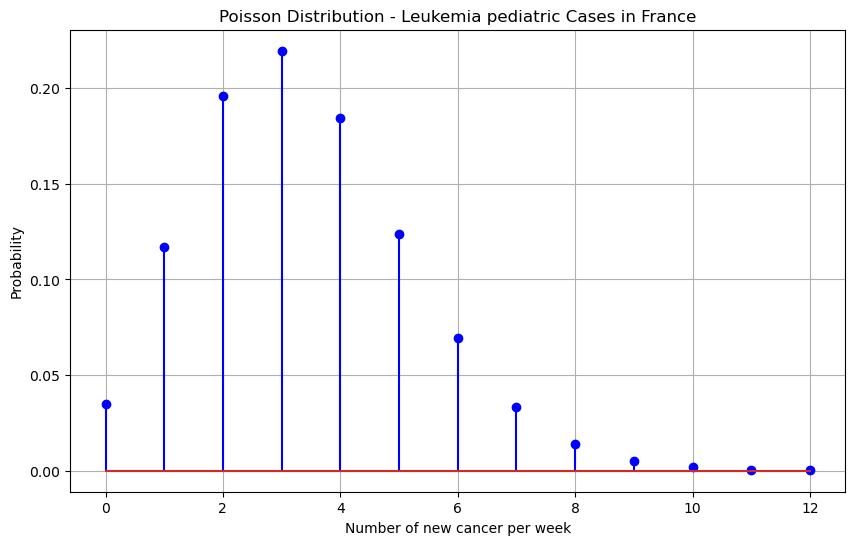

In [128]:


#1 Calculate the constant rate of the event λ
# Calculate the total number of weeks in the time interval
leukemia_pediatic_cancer = 178
time_interval = 1
tot_nbr_of_week = time_interval * 53
# Calculate the constant rate of pediatric cancer cases per week
constant_rate = leukemia_pediatic_cancer / tot_nbr_of_week

# Print the total number of death by new leukemia pediatric cases in 2018 and the constant rate
print(f'Number of death by leukemia pediatric cancer in 2018: {leukemia_pediatic_cancer:.2e} cases;\n'
      f'constant rate = {constant_rate:.2e} cases per week.')


    
#3 Define the range of k values we want to plot around our expected rate 
k_values = np.arange(0, round(constant_rate+10), 1) 


#4 Calculate the Poisson PMF for each k value, using the previously calculated constant rate
pmf_values = ss.poisson.pmf(k_values, constant_rate)  
mean, var, skew, kurt = ss.poisson.stats(constant_rate, moments='mvsk')
print(f'average {round(mean)}; variance {round(var)}')
#5 Calculate how much capacity it is needed to be 95% sure of fully processing the new cases
print(f'There is 95% chance to have a number a new cases inferior to : {ss.poisson.ppf(0.95, constant_rate)} per week in France')

#6 Plotting
plt.figure(figsize=(10, 6))
plt.stem(k_values, pmf_values, linefmt='b-', markerfmt='bo')
plt.title('Poisson Distribution - Leukemia pediatric Cases in France')
plt.xlabel('Number of new cancer per week')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

#### Analysis 
The Poisson distribution gives the different probabilities of th number of new leukemia pediatric cancer per week. It is normally distributed with the mean and variance equal the constant rate which is 3 cases per week. I calculate that there is a 95% chance to encounter 7 or fewer new cases per week. This could help in capacity planning to handle the expected load with a high level of confidence.

### Chi-square distribution

The Chi-square distribution is a probability distribution of a sum of the squares of k independent standard normal random variables. The shape of the distribution depends on the degrees of freedom k. Although it seems complicated, the Chi-square distribution is crucial in data science and easy to apply. One of the main application is to determine how well observed data match an expected distribution. The latter is often named the goodness-of-fit test.

#### Applications

* Goodness-of-fit 
    -  It helps in determining how well a statistical model fits the observed data. 
* Test of Independence
    - In contingency tables, the chi-square distribution is used to test whether two categorical variables are independent of each other.

#### Limitations

* Sensitivity to Sample Size
    - Small samples may not provide a reliable estimation of the population variance, while very large samples can make the chi-square test overly sensitive to small deviations from the hypothesis.

#### Example
In this example I will proceed to a test of independence between the Residence type and work type variable.
The null hypothesis is there no association between work type and residence type.


In [152]:
from scipy.stats import chi2_contingency

contingency=pd.crosstab(df["Residence_type"], df["work_type"])

chi2, p_value, dof, expected_contingency = chi2_contingency(contingency)
expected_df = pd.DataFrame(expected_work_residence, 
                           columns=["Govt_job", "Private", "Self-employed", "children"],
                           index=["Rural", "Urban"])

result_string = f"""
Chi-Square Test Results for Association Between Work Type and Residence Type:

Chi-Square Statistic (χ²): {chi2_work_residence:.4f}
P-value: {p_work_residence:.4f}
Degrees of Freedom: {dof_work_residence}

The observed contingency table
{contingency}

The expected contingency table
{expected_df}
"""

print(result_string)



Chi-Square Test Results for Association Between Work Type and Residence Type:

Chi-Square Statistic (χ²): 1.6774
P-value: 0.6420
Degrees of Freedom: 3

The observed contingency table
work_type       Govt_job  Private  Self-employed  children
Residence_type                                            
Rural                302     1405            371       333
Urban                328     1405            404       338

The expected contingency table
         Govt_job      Private  Self-employed    children
Rural  310.873926  1386.596398     382.424273  331.105403
Urban  319.126074  1423.403602     392.575727  339.894597



The p-value of 0.6420 suggests that there is a 64.20% chance of observing a Chi-Square statistic as extreme as or more extreme than 1.6774 due to random chance alone, assuming the null hypothesis of no association between work type and residence type is true.

Because the p-value is much greater than 0.05, the null hypothesis is rejected. This indicates that there's not enough evidence to suggest a statistically significant association between work type and residence type.


the chi-square statistic quantifies how the observed values deviate from the expected distribution. However, this value is often not used as it is. It is used to obtain the p-value which is a measure of how compatible the data are with the null hypothesis. In other word, assuming the null hypothesis is true, the p-value is the probability of observing the data or more extreme data (larger chi-square statistic) compared to the null hypothesis. Thus, a low p-value suggests that the difference between the observed and expected values is too large to attribute to chance variation alone. Therefore, the null hypothesis is rejected.

To obtain the p-value, we need first to determine the degrees of freedom (df) which is for a typically for a goodness-of-fit the number of variables minus one. Thus, in this example df = 18-1 = 17.

Then the p-value is the integrate over the chi-square distribution from the chi-square statistic to infinity.

I use in the following the chi2.sf function to compute the integrate and returning the p-value:

In [16]:
#6 Calculate the probability to obtain a chi-squared is equal or as extreme under the null hypothesis
p_value = ss.chi2.sf(chi_stat, 17)

# Output the p-value
f'The p-value is {p_value}'

'The p-value is 0.0'

### F-distribution
The F distribution is a probability distribution that arises in statistics when comparing the ratios of variances from two different samples or sets of data. In essence, the F distribution is used to assess whether there's a significant difference between the variances of two populations. We named an F-test, any statistical test where the test statistic (F-statistic) has an F-distribution under the null hypothesis. Thus calculating an F-statistic for a statistical test and comparing it to the F-distributions allows to accept or reject the null hypothesis.

#### Applications
* Analysis of Variance (ANOVA)
  - It is a statistical test to assess if at least one of the means from two of more groups significantly differs from the others. It calculates a F-statitic which is (in this case) the ratio of the variance between the groups to the variance within each of the group. The F-statistic compared to the F-distribution helps to accept of reject the null hypothesis which : thre are no differences among the group means.
  
* Regression Analysis
  -  It uses a F-statistic to test the overall significance of a regression model. It compares the error of the model with a model that assumes no relationship between the dependent variable and the independent variable.

#### Limitations 
* Normality
  - When using the F-distribution, data in each group or from each population should follow a normal distribution. 
* Comparing Variances
    - The F distribution is primarily used to compare variances across groups.
* Outliers
    - The presence of outliers can significantly affect the F statistic because it is based on variances. 


##### Examples
In this example, I will investigate if the difference between the means of the body mass index for the categories among the smoking status variable is stastically significant. In other words, I will assume that they share the same mean (null hypothesis) and calculate the probability that random chance gives a difference as least as pronounced as observed.

In [157]:
groups = df.groupby('smoking_status')['bmi'].apply(list)
anova_result = ss.f_oneway(*groups)



result = f"""
ANOVA Test Results on BMI Across Smoking Statuses:

F-Statistic: {anova_result.statistic:.2f}
P-value: {anova_result.pvalue:.2e}
"""

print(result)


ANOVA Test Results on BMI Across Smoking Statuses:

F-Statistic: 130.31
P-value: 3.32e-81



The very low p-value (significantly less than 0.05) indicates that we can reject the null hypothesis. This suggests that there are statistically significant differences in the mean BMI among the at leaset two smoking status categories.